# Holland Pressure

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults
from src.constants import KAT_EX_PATH, NO_BBOX
from src.conversions import millibar_to_pascal, pascal_to_millibar

plot_defaults()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
def ah77(pc):
    return 3.4 * (1010 - pc) ** 0.644

In [4]:
def dvorak(pc):
    return 3.92 * (1015 - pc) ** 0.644

In [5]:
def knaff_and_zehr(pc):
    return 2.3 * (1010 - pc) ** 0.76

In [6]:
import numpy as np
from scipy.constants import R


def bs(vmax, patvmax, pressure_delta, TatVmax):
    return vmax**2 * patvmax * np.e / pressure_delta / R / TatVmax

In [8]:
def bs_h10(vmax, pressuredelta):
    rhoatvmax = 1.15  # kg m s-1
    return vmax**2 * rhoatvmax / pressuredelta * (np.e)

In [3]:
from src.conversions import millibar_to_pascal, pascal_to_millibar

In [10]:
bs_h10(50, millibar_to_pascal(1010 - 914))

0.8140687767520578

In [13]:
bs_h10(50, millibar_to_pascal(1015 - 914))

0.7737683422593816

In [ ]:
def h80p(radius, pc, deltap, rmax, b):
    return pc + deltap * np.exp(-(r / rmax) ^ b)


def vm(b, rho, deltap):
    return (b / rho / e * deltap) ** 0.5

In [4]:
class Holland80:
    def __init__(self, pc, rmax, vmax) -> None:
        """ """
        self.pc = pc  # Pa
        self.rho = 1.15  # kg m-3
        self.pn = millibar_to_pascal(1010)  # Pa
        self.rmax = rmax  # meters
        self.vmax = vmax  # meters per second
        self.b_coeff = self.vmax**2 / (self.pn - self.pc) * np.e  # dimensionless

    def pressure(self, radii: np.ndarray) -> np.ndarray:
        return self.pn - (self.pn - self.pc) * np.exp(
            -((radii / self.rmax) ** self.b_coeff)
        )

    def velocity(self, radii: np.ndarray) -> float:
        return np.sqrt(
            (self.pn - self.pc)
            * np.exp(-((radii / self.rmax) ** self.b_coeff))
            * (radii / self.rmax) ** self.b_coeff
            * self.b_coeff
        )


kath80 = Holland80(millibar_to_pascal(915), 20e3, 50)

In [49]:
kath80 = Holland80(millibar_to_pascal(915), 20e3, 50)

In [6]:
radii = np.linspace(0, 1e6, num=int(1e4))

In [8]:
plot_defaults()

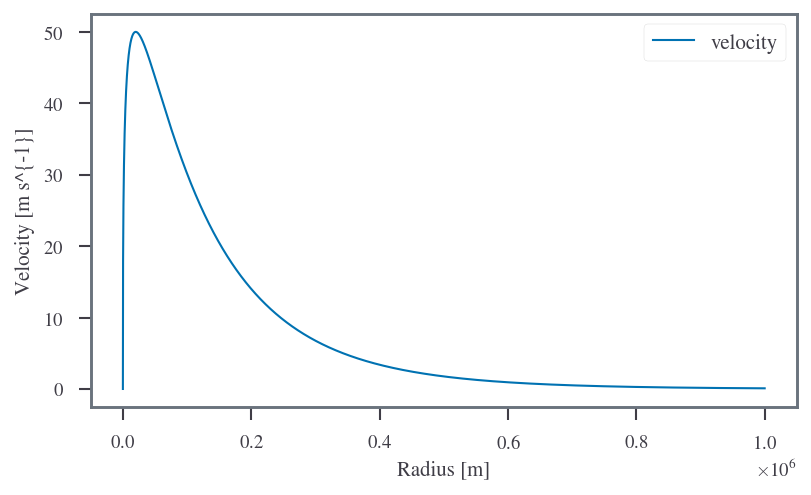

In [9]:
plt.plot(radii, kath80.velocity(radii), label="velocity")
plt.xlabel("Radius [m]")
plt.ylabel("Velocity [m s^{-1}]")
plt.legend()

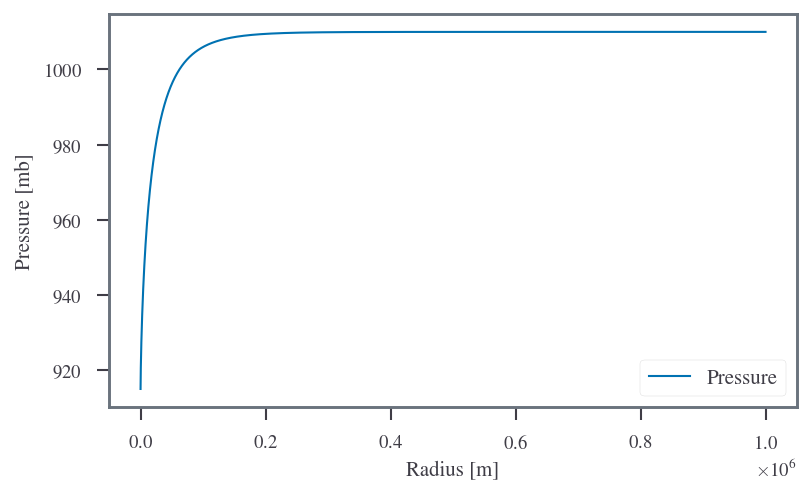

In [12]:
plt.plot(radii, pascal_to_millibar(kath80.pressure(radii)), label="Pressure")
plt.xlabel("Radius [m]")
plt.ylabel("Pressure [mb]")
plt.legend()

Text(0, 0.5, 'Pressure [mb]')

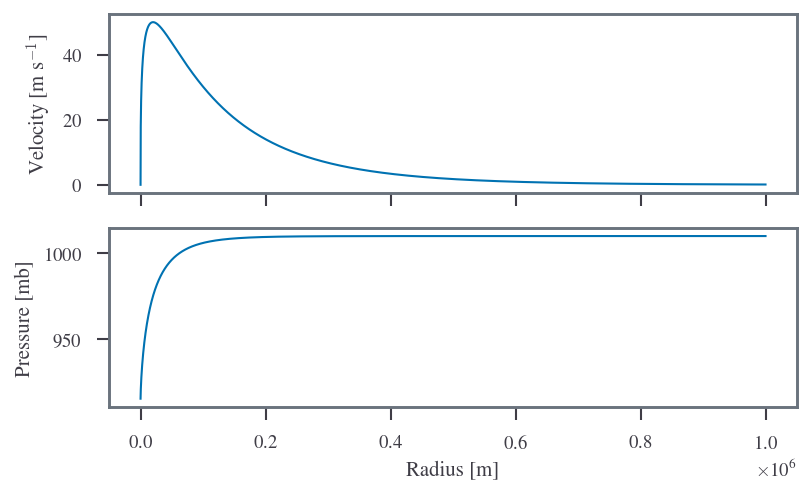

In [16]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(radii, kath80.velocity(radii), label="velocity")
axs[0].set_ylabel("Velocity [m s$^{-1}$]")
axs[1].plot(radii, pascal_to_millibar(kath80.pressure(radii)), label="Pressure")
axs[1].set_xlabel("Radius [m]")
axs[1].set_ylabel("Pressure [mb]")
# plt.legend()

example_pressure_netcdf -> distance_angle_to_point -> velocity netcdf, pressure_netcdf

In [20]:
import os
from src.constants import KAT_EX_PATH
from src.data_loading.adcirc import read_pressures

da = read_pressures(os.path.join(KAT_EX_PATH, "fort.221"))

In [41]:
from src.conversions import distances_to_points, angles_to_points
from src.constants import NEW_ORLEANS

In [57]:
lons, lats = np.meshgrid(da.lon, da.lat)
distances = distances_to_points(NEW_ORLEANS, lons, lats)
angles = angles_to_points(NEW_ORLEANS, lons, lats)

In [44]:
da

<xarray.DataArray (time: 56, lat: 100, lon: 100)>
array([[[1013.    , 1013.    , 1013.    , ..., 1010.2966, 1010.4775,
         1010.6447],
        [1013.    , 1013.    , 1013.    , ..., 1010.6697, 1010.783 ,
         1010.9056],
        [1009.2914, 1008.9754, 1008.0973, ..., 1010.9629, 1011.0248,
         1011.1621],
        ...,
        [1012.465 , 1012.6992, 1012.9182, ..., 1023.1059, 1023.0463,
         1022.936 ],
        [1012.2517, 1012.5207, 1012.8205, ..., 1023.3357, 1023.2102,
         1022.9503],
        [1011.9635, 1012.2302, 1012.4918, ..., 1023.5439, 1023.4296,
         1023.2481]],

       [[1013.    , 1013.    , 1013.    , ..., 1011.0361, 1011.0454,
         1011.0786],
        [1013.    , 1013.    , 1013.    , ..., 1011.0457, 1011.0869,
         1011.1701],
        [1013.1595, 1013.0921, 1012.3431, ..., 1011.0631, 1011.1424,
         1011.2816],
...
        [1017.5173, 1017.2454, 1016.9178, ..., 1000.3183, 1000.3212,
         1000.3277],
        [1017.4911, 1017.2142, 1016.9863, ..., 1000.4166, 1000.3196,
          999.9465],
        [1017.5693, 1017.2097, 1016.9624, ..., 1000.539 , 1000.5163,
         1000.2399]],

       [[1013.    , 1013.    , 1013.    , ..., 1012.5075, 1012.4803,
         1012.4228],
        [1013.    , 1013.    , 1013.    , ..., 1012.6166, 1012.582 ,
         1012.5295],
        [1011.8116, 1011.5509, 1011.2245, ..., 1012.7188, 1012.6796,
         1012.6487],
        ...,
        [1017.6496, 1017.5239, 1017.3366, ..., 1001.4318, 1001.48  ,
         1001.4604],
        [1017.5627, 1017.4346, 1017.3498, ..., 1001.5681, 1001.4239,
         1001.0581],
        [1017.5258, 1017.3431, 1017.2236, ..., 1001.6728, 1001.5332,
         1001.2495]]])
Coordinates:
  * lon      (lon) float64 -99.0 -98.75 -98.5 -98.25 ... -74.75 -74.5 -74.25
  * lat      (lat) float64 17.0 17.25 17.5 17.75 18.0 ... 41.0 41.25 41.5 41.75
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Attributes:
    long_name:    Pressure
    description:  Surface pressure
    units:        mb

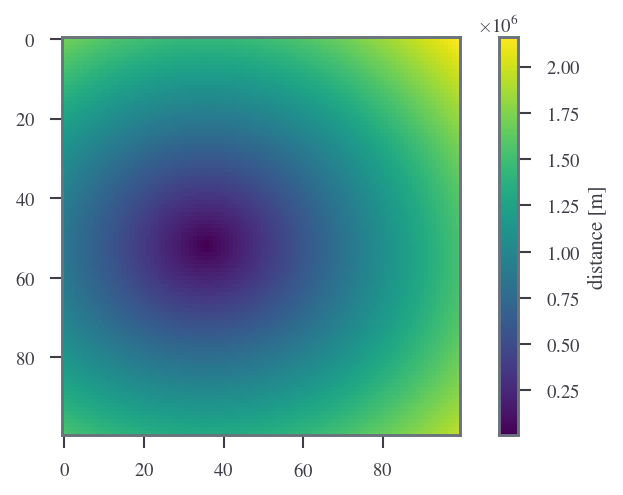

In [58]:
plt.imshow(distances)
plt.colorbar(label="distance [m]")

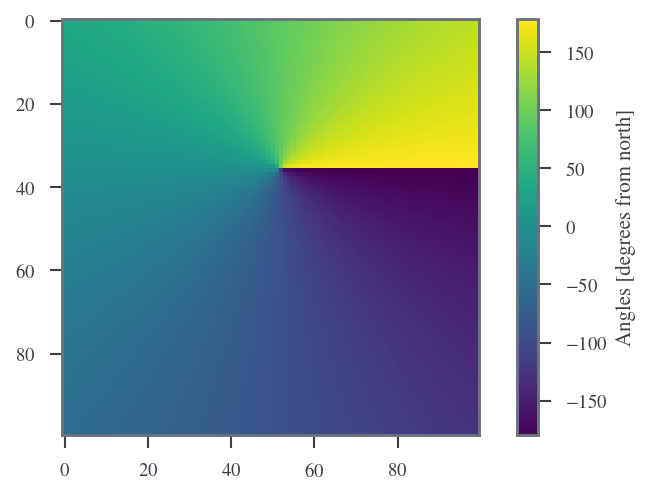

In [43]:
plt.imshow(angles)
plt.colorbar(label="Angles [degrees from north]")

In [81]:
import xarray as xr

ds = xr.Dataset(
    data_vars=dict(
        distance=(["lat", "lon"], distances),
        angle=(["lat", "lon"], angles),
    ),
    coords=dict(
        lat=(["lat"], da.lat.values),
        lon=(["lon"], da.lon.values),
    ),
)
ds.distance.attrs = {"units": "meters", "long_name": "Distance from center"}
ds.angle.attrs = {"units": "degrees", "long_name": "Angle from center"}

In [51]:
from sithom.xr import plot_units

In [66]:
ds = plot_units(ds, x_dim="lon", y_dim="lat")

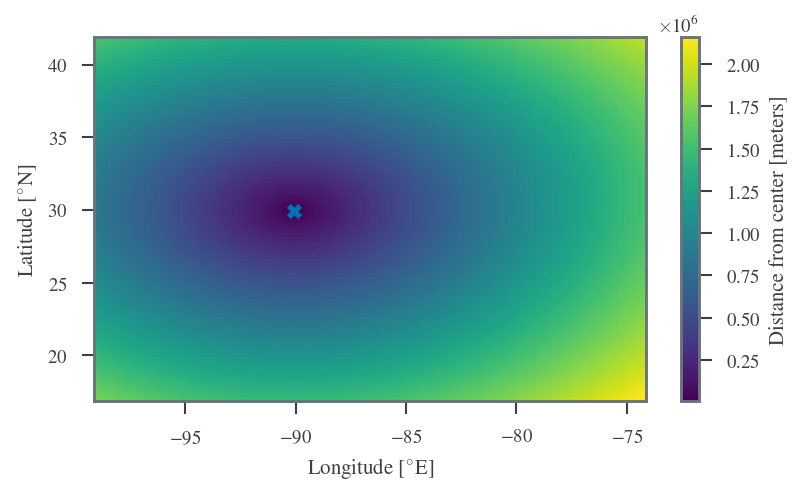

In [67]:
ds.distance.plot()
plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat)

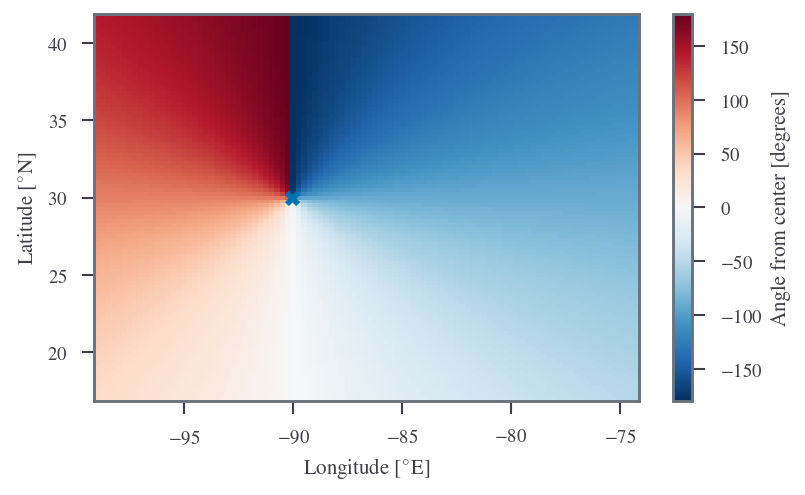

In [68]:
ds.angle.plot()
plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat)

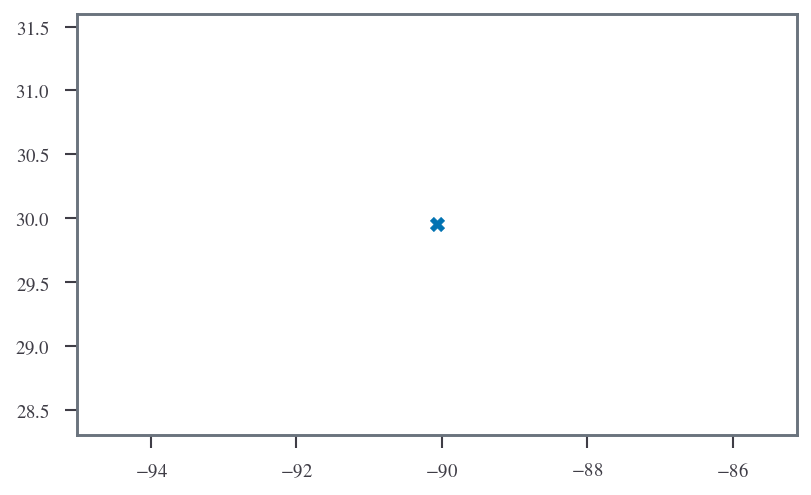

In [70]:
plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat)

In [82]:
windspeed = kath80.velocity(ds.distance.values) # self.windspeed_at_points(lats, lons, point)
angle = np.radians(ds.angle.values - 90.0)
u10, v10 = np.sin(angle) * windspeed, np.cos(angle) * windspeed

In [88]:
vds = xr.Dataset(
    data_vars=dict(
        U10=(["lat", "lon"], u10),
        V10=(["lat", "lon"], v10),
    ),
    coords=dict(
        lat=(["lat"], da.lat.values),
        lon=(["lon"], da.lon.values),
    ),
)
vds.U10.attrs = {"units": "m s**-1", "long_name": "Zonal velocity"}
vds.V10.attrs = {"units": "m s**-1", "long_name": "Meridional velocity"}
plot_units(vds, x_dim="lon", y_dim="lat")
# ds.distance.attrs = {"units": "meters", "long_name": "Distance from center"}
# ds.angle.attrs = {"units": "degrees", "long_name": "Angle from center"}

<xarray.Dataset>
Dimensions:  (lat: 100, lon: 100)
Coordinates:
  * lat      (lat) float64 17.0 17.25 17.5 17.75 18.0 ... 41.0 41.25 41.5 41.75
  * lon      (lon) float64 -99.0 -98.75 -98.5 -98.25 ... -74.75 -74.5 -74.25
Data variables:
    U10      (lat, lon) float64 -0.002023 -0.002178 ... 0.0005373 0.0004926
    V10      (lat, lon) float64 0.001395 0.00146 ... -0.0007091 -0.0006606

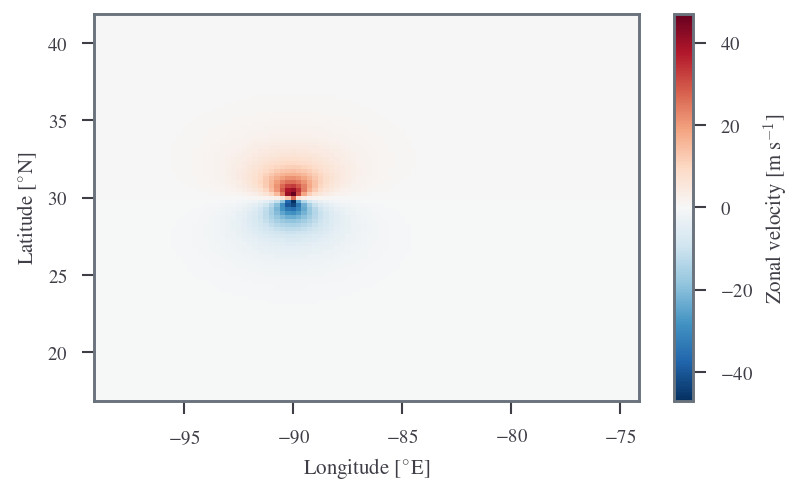

In [89]:
vds.U10.plot()

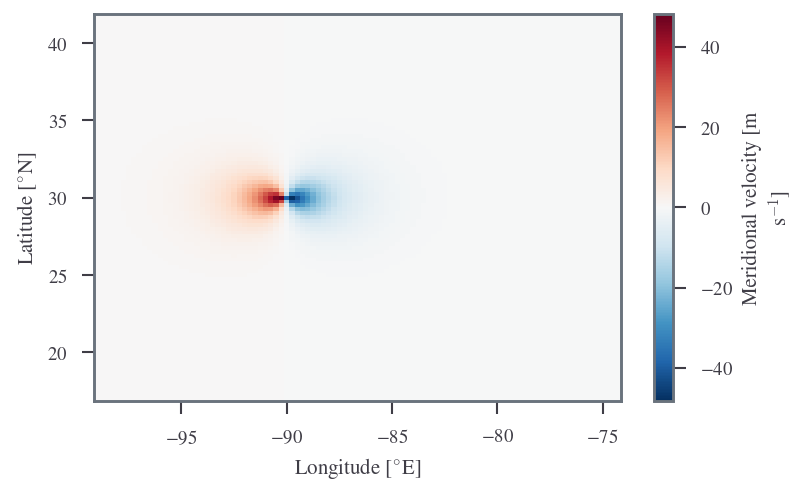

In [90]:
vds.V10.plot()

In [96]:
from sithom.place import Point
import datetime

def new_point(time) -> Point:
    """
    Assumes 111km per degree.

    Args:
        distance (float): Distance in meters.

    Returns:
        List[float, float]: lon, lat.
    """
    angle = 30
    trans_speed = 5 # m s -1
    # time_delta = datetime.timedelta(hours=3)
    impact_time = datetime.datetime(year=2005, month=8, day=29, hour=12)
    time_delta = impact_time - time
    distance = time_delta / datetime.timedelta(hours=3) * trans_speed
    return Point(
        NEW_ORLEANS.lon + np.sin(np.radians(angle)) * distance / 111e3,
        NEW_ORLEANS.lat + np.cos(np.radians(angle)) * distance / 111e3,
    )

In [97]:
new_point(datetime.datetime(year=2005, month=8, day=29, hour=3))

[('Latitude', 29.951217030459972, 'degrees_north'), ('Longitude', -90.07143243243243, 'degrees_east'), 'NONE']

In [120]:
[new_point(datetime.datetime.utcfromtimestamp(
    (x - np.datetime64('1970-01-01T00:00:00')) / np.timedelta64(1, "s"))
) for x in da.time.values]

[[('Latitude', 29.95250436551965, 'degrees_north'), ('Longitude', -90.0706891891892, 'degrees_east'), 'NONE'],
 [('Latitude', 29.95246535536633, 'degrees_north'), ('Longitude', -90.07071171171171, 'degrees_east'), 'NONE'],
 [('Latitude', 29.952426345213002, 'degrees_north'), ('Longitude', -90.07073423423424, 'degrees_east'), 'NONE'],
 [('Latitude', 29.95238733505968, 'degrees_north'), ('Longitude', -90.07075675675675, 'degrees_east'), 'NONE'],
 [('Latitude', 29.952348324906357, 'degrees_north'), ('Longitude', -90.07077927927928, 'degrees_east'), 'NONE'],
 [('Latitude', 29.952309314753034, 'degrees_north'), ('Longitude', -90.0708018018018, 'degrees_east'), 'NONE'],
 [('Latitude', 29.952270304599708, 'degrees_north'), ('Longitude', -90.07082432432432, 'degrees_east'), 'NONE'],
 [('Latitude', 29.952231294446385, 'degrees_north'), ('Longitude', -90.07084684684685, 'degrees_east'), 'NONE'],
 [('Latitude', 29.952192284293062, 'degrees_north'), ('Longitude', -90.07086936936938, 'degrees_east'

In [115]:
np.datetime64('2002-06-28T01:00:00.000000000+0100').astype(datetime.datetime)

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_5933/799472280.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  np.datetime64('2002-06-28T01:00:00.000000000+0100').astype(datetime.datetime)


1025222400000000000

In [ ]:
datetime.utcfromtimestamp(
    (dt64 - np.datetime64(time)) / np.timedelta64(1, "s")
)